In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
#from kneed import KneeLocator
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import matplotlib.pyplot as plt
#import psycopg2
import seaborn as sns
import pickle
import os
import sys

In [92]:
Exp_data=pd.read_csv("E:\\10xAccademy_Practice\\Week 1\\Data\\OutlierRemved_telecoData_outliers.csv")
Exp_data.head(5)

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,14.416352,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,16.578971,14.732334,15.919515,16.083116,19.443428,16.478853,18.961518,15.991897,17.419642,19.548462
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,14.126741,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,16.823537,16.765813,16.724508,16.661996,20.226918,13.973120,20.082529,16.527230,17.800791,20.297677
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,14.124290,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,16.797431,16.503329,16.682716,15.634140,19.251782,12.888235,19.833356,15.254341,17.143551,19.449612
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,14.094285,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,16.878346,16.533289,16.454185,13.908948,20.499545,16.199650,20.434303,16.364743,17.584222,20.556064
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,13.900779,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,16.540705,16.757994,16.656025,12.936559,20.084052,15.076752,20.126718,16.448142,17.467280,20.159635


In [46]:
df=Exp_data.copy()

In [4]:
df.columns.tolist()

['bearer_id',
 'start',
 'start_ms',
 'end',
 'end_ms',
 'dur._(ms)',
 'imsi',
 'msisdn/number',
 'imei',
 'last_location_name',
 'avg_rtt_dl_(ms)',
 'avg_rtt_ul_(ms)',
 'avg_bearer_tp_dl_(kbps)',
 'avg_bearer_tp_ul_(kbps)',
 'tcp_dl_retrans._vol_(bytes)',
 'tcp_ul_retrans._vol_(bytes)',
 'dl_tp_<_50_kbps_(%)',
 '50_kbps_<_dl_tp_<_250_kbps_(%)',
 '250_kbps_<_dl_tp_<_1_mbps_(%)',
 'dl_tp_>_1_mbps_(%)',
 'ul_tp_<_10_kbps_(%)',
 '10_kbps_<_ul_tp_<_50_kbps_(%)',
 '50_kbps_<_ul_tp_<_300_kbps_(%)',
 'ul_tp_>_300_kbps_(%)',
 'http_dl_(bytes)',
 'http_ul_(bytes)',
 'activity_duration_dl_(ms)',
 'activity_duration_ul_(ms)',
 'dur._(ms).1',
 'handset_manufacturer',
 'handset_type',
 'nb_of_sec_with_125000b_<_vol_dl',
 'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
 'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
 'nb_of_sec_with_37500b_<_vol_ul',
 'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
 'nb_of_sec_with_6250b_<_vol_ul_<_37500b',
 'nb_of_sec_with_vol_dl_<_6250b',
 'nb_of_sec_with_vol_ul_<_1250b',
 'socia

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='avg_rtt_ul_(ms)'>

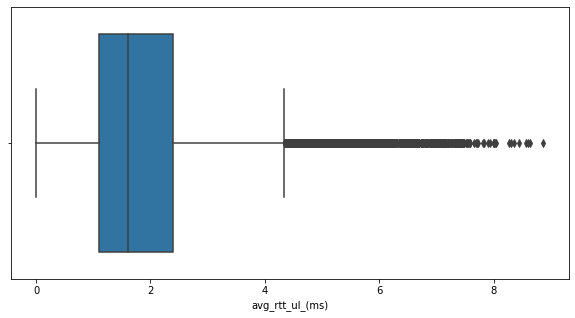

In [93]:
plt.figure(figsize=(10,5))
sns.boxplot(df["avg_rtt_ul_(ms)"], orient="vert")

# Load Both Engagement and Experiance Analysis data 

In [139]:
# Import user experience data
User_Exaperiance_Data = pd.read_csv('E:\\10xAccademy_Practice\\Week 1\\User Experiance Analysis\\Processed_Data\\UserExperiance_data.csv')
# Import user engagement data
User_Engagement_Data = pd.read_csv('E:\\10xAccademy_Practice\\Week 1\\User Engagement Analysis\\Processed_Data\\UserEngagement_data.csv')
User_Exaperiance_Data

,msisdn/number,cluster,avg_rtt_total,avg_bearer_tp_total,avg_tcp_retrans_total,avg_tp_total,total_avg_tcp_total
0,3.360100e+10,1,8.114390,7.274480,23.201031,7.274480,23.201031
1,3.360100e+10,1,3.401197,7.803027,23.201031,7.803027,23.201031
2,3.360100e+10,1,5.416100,7.763021,23.201031,7.763021,23.201031
3,3.360101e+10,2,6.942157,9.102310,16.921539,9.102310,16.921539
4,3.360101e+10,2,8.114390,27.135851,49.213729,27.135851,49.213729
...,...,...,...,...,...,...,...
106851,3.379000e+10,0,6.040255,15.166563,20.285299,15.166563,20.285299
106852,3.379000e+10,1,5.318120,8.090709,23.201031,8.090709,23.201031
106853,3.200000e+12,2,5.416100,16.089721,23.201031,16.089721,23.201031
106854,3.370000e+14,1,5.416100,5.488938,23.201031,5.488938,23.201031


In [112]:
User_Engagement_Data

,msisdn/number,cluster,session_id,dur._(ms),Total_Data
0,3.360100e+10,0,1,11.667533,37.952551
1,3.360100e+10,1,1,12.107522,36.011203
2,3.360100e+10,0,1,11.812800,37.624373
3,3.360101e+10,0,1,10.817335,36.639432
4,3.360101e+10,2,2,19.656666,75.943057
...,...,...,...,...,...
106850,3.379000e+10,2,1,9.083643,37.449980
106851,3.379000e+10,1,1,11.856430,37.304194
106852,3.197020e+12,1,1,13.684701,36.522022
106853,3.370000e+14,1,1,12.441263,37.958856


In [140]:
User_Exaperiance_Data.drop([106855], axis=0, inplace=True)
User_Exaperiance_Data.head(5)

,msisdn/number,cluster,avg_rtt_total,avg_bearer_tp_total,avg_tcp_retrans_total,avg_tp_total,total_avg_tcp_total
0,3.360100e+10,1,8.114390,7.274480,23.201031,7.274480,23.201031
1,3.360100e+10,1,3.401197,7.803027,23.201031,7.803027,23.201031
2,3.360100e+10,1,5.416100,7.763021,23.201031,7.763021,23.201031
3,3.360101e+10,2,6.942157,9.102310,16.921539,9.102310,16.921539
4,3.360101e+10,2,8.114390,27.135851,49.213729,27.135851,49.213729


In [ ]:
user_eng_df = user_eng.set_index('msisdn/number')[
    ['sessions','dur._(ms)', 'total_data']]
scaler = StandardScaler()
scaled_array = scaler.fit_transform(user_eng_df)
pd.DataFrame(scaled_array).head(5)

In [114]:
with open("E:\\10xAccademy_Practice\\Week 1\\User Experiance Analysis\\K-Means Model\\UserExperiance_K-Means_Model.pkl", "rb") as f:
    kmeans_Experiance = pickle.load(f)
    
with open("E:\\10xAccademy_Practice\\Week 1\\User Engagement Analysis\\K_Means Model\\UserEngagement_KNN_Model.pkl", "rb") as f:
    kmeans_Engagement = pickle.load(f)


In [141]:
User_Engagement_Data_DF = User_Engagement_Data.set_index('msisdn/number')[
    ['session_id','dur._(ms)', 'Total_Data']]
scaler = StandardScaler()
scaled_array = scaler.fit_transform(User_Engagement_Data_DF)
pd.DataFrame(scaled_array).head(5)

,0,1,2
0,-0.488567,-0.435768,-0.463579
1,-0.488567,-0.389114,-0.528306
2,-0.488567,-0.420365,-0.474521
3,-0.488567,-0.525918,-0.507360
4,0.752095,0.411355,0.803074


In [116]:
User_Engagement_Data_normalized = normalize(scaled_array)
pd.DataFrame(User_Engagement_Data_normalized).head(5)

data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(5)

,0,1,2
0,-0.609047,-0.543228,-0.577897
1,-0.597230,-0.475658,-0.645807
2,-0.610435,-0.525221,-0.592885
3,-0.555800,-0.598291,-0.577178
4,0.640275,0.350195,0.683674


# Calculate the distance

In [117]:
distance = kmeans_Engagement.fit_transform(User_Engagement_Data_normalized)
distance_from_less_engagement = list(
    map(lambda x: x[3], distance))
User_Engagement_Data['engagement_score'] = distance_from_less_engagement
User_Engagement_Data.head(5)

,msisdn/number,cluster,session_id,dur._(ms),Total_Data,engagement_score
0,3.360100e+10,0,1,11.667533,37.952551,1.995702
1,3.360100e+10,1,1,12.107522,36.011203,1.998720
2,3.360100e+10,0,1,11.812800,37.624373,1.996958
3,3.360101e+10,0,1,10.817335,36.639432,1.990648
4,3.360101e+10,2,2,19.656666,75.943057,0.100884


In [118]:
len(User_Exaperiance_Data)

106855

In [124]:
User_Exaperiance_Data_DF = User_Exaperiance_Data.copy()
#User_Exaperiance_Data.drop([106855], axis=0, inplace=True)
User_Exaperiance_Data_DF

,msisdn/number,cluster,avg_rtt_total,avg_bearer_tp_total,avg_tcp_retrans_total,avg_tp_total,total_avg_tcp_total
0,3.360100e+10,1,8.114390,7.274480,23.201031,7.274480,23.201031
1,3.360100e+10,1,3.401197,7.803027,23.201031,7.803027,23.201031
2,3.360100e+10,1,5.416100,7.763021,23.201031,7.763021,23.201031
3,3.360101e+10,2,6.942157,9.102310,16.921539,9.102310,16.921539
4,3.360101e+10,2,8.114390,27.135851,49.213729,27.135851,49.213729
...,...,...,...,...,...,...,...
106850,3.378998e+10,0,11.874439,28.221172,37.334416,28.221172,37.334416
106851,3.379000e+10,0,6.040255,15.166563,20.285299,15.166563,20.285299
106852,3.379000e+10,1,5.318120,8.090709,23.201031,8.090709,23.201031
106853,3.200000e+12,2,5.416100,16.089721,23.201031,16.089721,23.201031


In [122]:
User_Exaperiance_Data_DF.head()
len(User_Exaperiance_Data_DF)
len(User_Engagement_Data_normalized)

106855

In [125]:


exp_df = User_Exaperiance_Data_DF.set_index('msisdn/number')
distance = kmeans_Experiance.fit_transform(User_Engagement_Data_normalized)
distance_from_worest_experiance = list(
    map(lambda x: x[0], distance))
User_Exaperiance_Data_DF['experience_score'] = distance_from_worest_experiance
User_Exaperiance_Data_DF.head(5)

,msisdn/number,cluster,avg_rtt_total,avg_bearer_tp_total,avg_tcp_retrans_total,avg_tp_total,total_avg_tcp_total,experience_score
0,3.360100e+10,1,8.114390,7.274480,23.201031,7.274480,23.201031,1.996163
1,3.360100e+10,1,3.401197,7.803027,23.201031,7.803027,23.201031,1.993855
2,3.360100e+10,1,5.416100,7.763021,23.201031,7.763021,23.201031,1.995968
3,3.360101e+10,2,6.942157,9.102310,16.921539,9.102310,16.921539,1.995601
4,3.360101e+10,2,8.114390,27.135851,49.213729,27.135851,49.213729,0.232649


In [138]:
user_eng_id = User_Engagement_Data['msisdn/number'].values
user_expr_id = User_Exaperiance_Data['msisdn/number'].values
user_intersection = list(
    set(user_eng_id).intersection(user_expr_id))
user_intersection[:5]
user_intersection

AttributeError: 'list' object has no attribute 'head'

In [137]:
user_eng_df = User_Engagement_Data[User_Engagement_Data['msisdn/number'].isin(
    user_intersection)]
user_eng_df.shape
user_eng_df.head()

,msisdn/number,cluster,session_id,dur._(ms),Total_Data,engagement_score
0,3.360100e+10,0,1,11.667533,37.952551,1.995702
1,3.360100e+10,1,1,12.107522,36.011203,1.998720
2,3.360100e+10,0,1,11.812800,37.624373,1.996958
3,3.360101e+10,0,1,10.817335,36.639432,1.990648
4,3.360101e+10,2,2,19.656666,75.943057,0.100884


In [135]:
user_exper_df = User_Exaperiance_Data[User_Exaperiance_Data['msisdn/number'].isin(
    user_intersection)]
user_exper_df.shape
user_exper_df.head()

,msisdn/number,cluster,avg_rtt_total,avg_bearer_tp_total,avg_tcp_retrans_total,avg_tp_total,total_avg_tcp_total
0,3.360100e+10,1,8.114390,7.274480,23.201031,7.274480,23.201031
1,3.360100e+10,1,3.401197,7.803027,23.201031,7.803027,23.201031
2,3.360100e+10,1,5.416100,7.763021,23.201031,7.763021,23.201031
3,3.360101e+10,2,6.942157,9.102310,16.921539,9.102310,16.921539
4,3.360101e+10,2,8.114390,27.135851,49.213729,27.135851,49.213729


In [132]:
# Calulate the satisfaction score for each customer based on engagement & experience score

In [134]:
user_df = pd.merge(user_eng_df, user_exper_df, on='msisdn/number')
user_df['satisfaction_score'] = (
    user_df['engagement_score'] + user_df['experience_score'])/2
user_df.head(5)

KeyError: 'experience_score'